In [32]:
import pandas as pd
# 데이터 예시
data = {
'CustomerID': [1, 2, 3, 4, 5],
'Age': [25, 30, None, 35, 28],
'Gender': ['Male', 'Female', 'Female', 'Male', None],
'Satisfaction': [5, 4, 3, None, 2],
'PurchaseAmount': [100, 200, None, 150, 0]
}
df = pd.DataFrame(data)

In [6]:
print(df.head())

   CustomerID   Age  Gender  Satisfaction  PurchaseAmount
0           1  25.0    Male           5.0           100.0
1           2  30.0  Female           4.0           200.0
2           3   NaN  Female           3.0             NaN
3           4  35.0    Male           NaN           150.0
4           5  28.0    None           2.0             0.0


In [33]:
# 나이는 평균값으로
df['Age'] = df['Age'].fillna(df['Age'].mean())
# 구매액은 : 0
df['PurchaseAmount'] = df['PurchaseAmount'].fillna(0)
# 만족도 : 평균
df['Satisfaction'] = df['Satisfaction'].fillna(df['Satisfaction'].mean())
print(df)

   CustomerID   Age  Gender  Satisfaction  PurchaseAmount
0           1  25.0    Male           5.0           100.0
1           2  30.0  Female           4.0           200.0
2           3  29.5  Female           3.0             0.0
3           4  35.0    Male           3.5           150.0
4           5  28.0    None           2.0             0.0


In [34]:
print(df.describe())

       CustomerID        Age  Satisfaction  PurchaseAmount
count    5.000000   5.000000      5.000000        5.000000
mean     3.000000  29.500000      3.500000       90.000000
std      1.581139   3.640055      1.118034       89.442719
min      1.000000  25.000000      2.000000        0.000000
25%      2.000000  28.000000      3.000000        0.000000
50%      3.000000  29.500000      3.500000      100.000000
75%      4.000000  30.000000      4.000000      150.000000
max      5.000000  35.000000      5.000000      200.000000


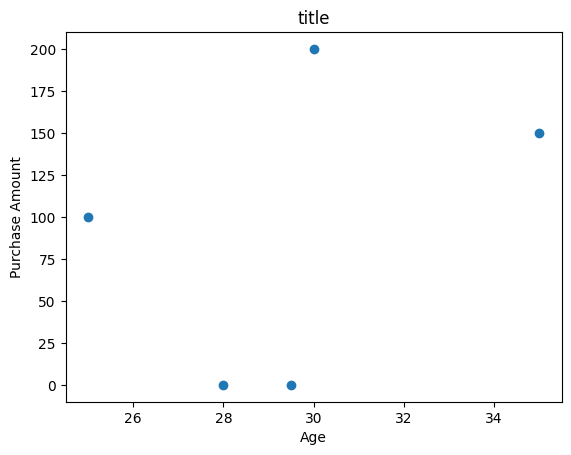

In [35]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['PurchaseAmount'])
plt.title('title')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')

plt.show()

Gender
Female    3.50
Male      4.25
Name: Satisfaction, dtype: float64


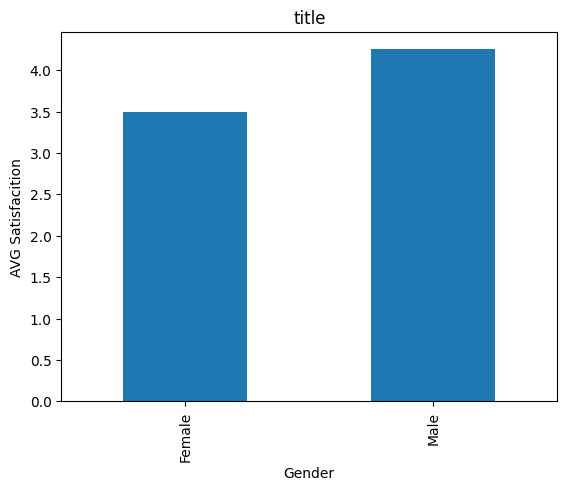

In [36]:
gender_satisfaction = df.groupby('Gender')['Satisfaction'].mean()
print(gender_satisfaction)
gender_satisfaction.plot(kind='bar')

plt.title('title')
plt.xlabel('Gender')
plt.ylabel('AVG Satisfacition')
plt.show()

In [37]:
# Gender는 숫자로 변환(Labeling Enocoding)
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

# 특성과 타겟 분리리
X = df[['Age', 'Gender', 'PurchaseAmount']] # 입력 데이터
y = df['Satisfaction'] # 출력 데이터
print(X)
print(y)


    Age  Gender  PurchaseAmount
0  25.0     0.0           100.0
1  30.0     1.0           200.0
2  29.5     1.0             0.0
3  35.0     0.0           150.0
4  28.0     NaN             0.0
0    5.0
1    4.0
2    3.0
3    3.5
4    2.0
Name: Satisfaction, dtype: float64


In [39]:
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("학습 데이터 크기: ", X_train.shape)
print("테스트 데이터 크기: ", X_test.shape)

print(X_train)
print('*'*10)
print(y_train)
print('*'*10)
print(X_test)
print('*'*10)
print(y_test)

학습 데이터 크기:  (4, 3)
테스트 데이터 크기:  (1, 3)
    Age  Gender  PurchaseAmount
4  28.0     NaN             0.0
2  29.5     1.0             0.0
0  25.0     0.0           100.0
3  35.0     0.0           150.0
**********
4    2.0
2    3.0
0    5.0
3    3.5
Name: Satisfaction, dtype: float64
**********
    Age  Gender  PurchaseAmount
1  30.0     1.0           200.0
**********
1    4.0
Name: Satisfaction, dtype: float64


학습된 기울기(m): 6.86
학습된 y절편(b): 42.19


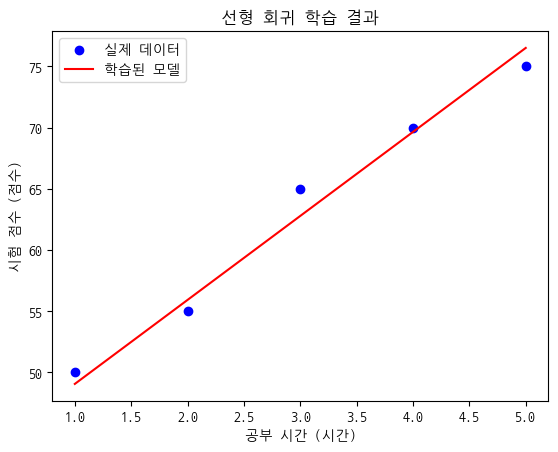

새로운 공부 시간에 따른 예측 점수: [ 83.36696784  97.09256028 110.81815271]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 준비
X = np.array([1, 2, 3, 4, 5]) # 공부 시간 (입력 데이터)
y = np.array([50, 55, 65, 70, 75]) # 시험 점수 (출력 데이터)

# 2. 초기 값 설정
m = 0 # 초기 기울기
b = 0 # 초기 y절편
learning_rate = 0.01 # 학습 속도
epochs = 1000 # 학습 반복 횟수

# 3. 경사하강법을 이용한 학습
for _ in range(epochs):
    # 예측 값 계산
    y_pred = m * X + b
    # 손실 함수(MSE) 계산
    error = y - y_pred
    mse = (error ** 2).mean()
    # 기울기(m)와 y절편(b)의 변화량 계산
    m_gradient = -(2 / len(X)) * sum(X * error)
    b_gradient = -(2 / len(X)) * sum(error)
    # 기울기와 절편 업데이트
    m -= learning_rate * m_gradient
    b -= learning_rate * b_gradient
# 학습 결과 출력
print(f"학습된 기울기(m): {m:.2f}")
print(f"학습된 y절편(b): {b:.2f}")

# 4. 학습 결과 시각화
y_pred = m * X + b # 학습된 모델의 예측 값
plt.rc('font', family='NanumGothicCoding') # For Windows
plt.scatter(X, y, color='blue', label='실제 데이터') # 실제 데이터
plt.plot(X, y_pred, color='red', label='학습된 모델') # 학습된 직선
plt.xlabel('공부 시간 (시간)')
plt.ylabel('시험 점수 (점수)')
plt.legend()
plt.title('선형 회귀 학습 결과')
plt.show()

# 5. 새로운 데이터 예측
new_study_hours = np.array([6, 8, 10]) # 새로운 공부 시간
predicted_scores = m * new_study_hours + b
print("새로운 공부 시간에 따른 예측 점수:", predicted_scores)

학습된 기울기(m): 6.50
학습된 y절편(b): 43.50
MSE: 1.50
RMSE: 1.22
MAE: 1.00
R^2: 0.98


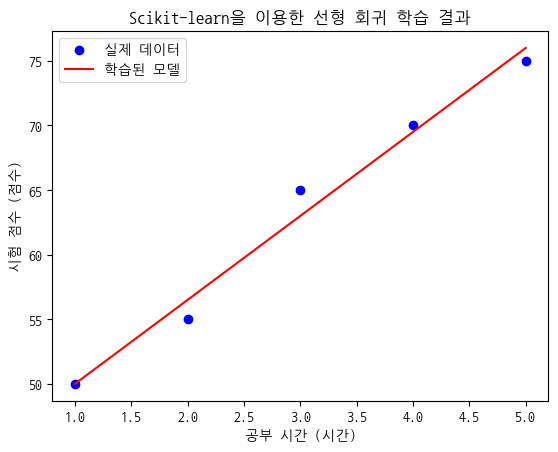

새로운 공부 시간에 따른 예측 점수: [ 82.5  95.5 108.5]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 데이터 준비
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # 공부 시간 (2D 배열로 변환)
y = np.array([50, 55, 65, 70, 75]) # 시험 점수

# 2. 모델 학습
model = LinearRegression() # 선형 회귀 모델 생성
model.fit(X, y) # 모델 학습

# 3. 학습된 모델의 기울기와 절편 확인
m = model.coef_[0] # 기울기
b = model.intercept_ # 절편
print(f"학습된 기울기(m): {m:.2f}")
print(f"학습된 y절편(b): {b:.2f}")

# 4. 예측 값 계산
y_pred = model.predict(X) # 학습 데이터에 대한 예측 값

# 5. 성능 평가
mse = mean_squared_error(y, y_pred) # MSE 계산
rmse = np.sqrt(mse) # RMSE 계산
mae = mean_absolute_error(y, y_pred) # MAE 계산
r2 = r2_score(y, y_pred) # R^2 계산

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

# 6. 학습 결과 시각화
plt.rc('font', family='NanumGothicCoding') # For Windows
plt.scatter(X, y, color='blue', label='실제 데이터') # 실제 데이터
plt.plot(X, y_pred, color='red', label='학습된 모델') # 학습된 직선
plt.xlabel('공부 시간 (시간)')
plt.ylabel('시험 점수 (점수)')
plt.legend()
plt.title('Scikit-learn을 이용한 선형 회귀 학습 결과')
plt.show()

# 7. 새로운 데이터 예측
new_study_hours = np.array([6, 8, 10]).reshape(-1, 1) # 새로운 공부 시간
predicted_scores = model.predict(new_study_hours) # 예측
print("새로운 공부 시간에 따른 예측 점수:", predicted_scores)

In [6]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋 로드
from sklearn.model_selection import train_test_split # 학습용/테스트용 데이터 분리
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # 평가 지표


In [7]:
# 데이터 로드
data = load_breast_cancer()
x = data.data
y = data.target

In [8]:
# 데이터 분류 : 학습 데이터 와 테스트 데이터
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# 로지스틱 회귀
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)


LogisticRegression(max_iter=10000)

In [11]:
# 테스트 예측
y_pred = model.predict(x_test)


In [12]:
# 평가 지표
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [13]:
print("accuracy : ", accuracy)
print("precision : ", precision)
print("recall : ", recall)
print("f1 : ", f1)


accuracy :  0.956140350877193
precision :  0.9459459459459459
recall :  0.9859154929577465
f1 :  0.9655172413793104


In [15]:
print(confusion_matrix(y_test, y_pred))

[[39  4]
 [ 1 70]]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [17]:
# 1. 필요한 라이브러리 임포트
from sklearn.datasets import load_iris # Iris 데이터셋 로드
from sklearn.model_selection import train_test_split # 데이터 분리
from sklearn.neighbors import KNeighborsClassifier # KNN 알고리즘 사용
from sklearn.metrics import classification_report, accuracy_score #성능평가

In [18]:
# 데이터 준비
iris = load_iris()
x = iris.data
y = iris.target


In [30]:
# 데이터 구조 확인
print(x.shape)
print(y.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [22]:
# 데이터 분리 : 학습/테스트
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [25]:
# KNN 모델 학습
k = 3
knn = KNeighborsClassifier(n_neighbors=k)


In [26]:
# 모델 학습
knn.fit(x_train, y_train) # 훈련 데이터로 학습

KNeighborsClassifier(n_neighbors=3)

In [27]:
# 모델 평가
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN 모델 정확도 (K={k}) : {accuracy * 100:.2f}%')

KNN 모델 정확도 (K=3) : 100.00%


In [28]:
print('\n분류보고서:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))


분류보고서:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
# 7. 새로운 데이터 예측
new_data = [[5.0, 3.5, 1.3, 0.3]] # 예측할 새로운 데이터 (꽃잎/꽃받침 크기)
prediction = knn.predict(new_data) # 예측
predicted_class = iris.target_names[prediction][0] # 예측된 품종 이름
print(f"\n새로운 데이터 {new_data}의 예측 결과: {predicted_class}")


새로운 데이터 [[5.0, 3.5, 1.3, 0.3]]의 예측 결과: setosa
